/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


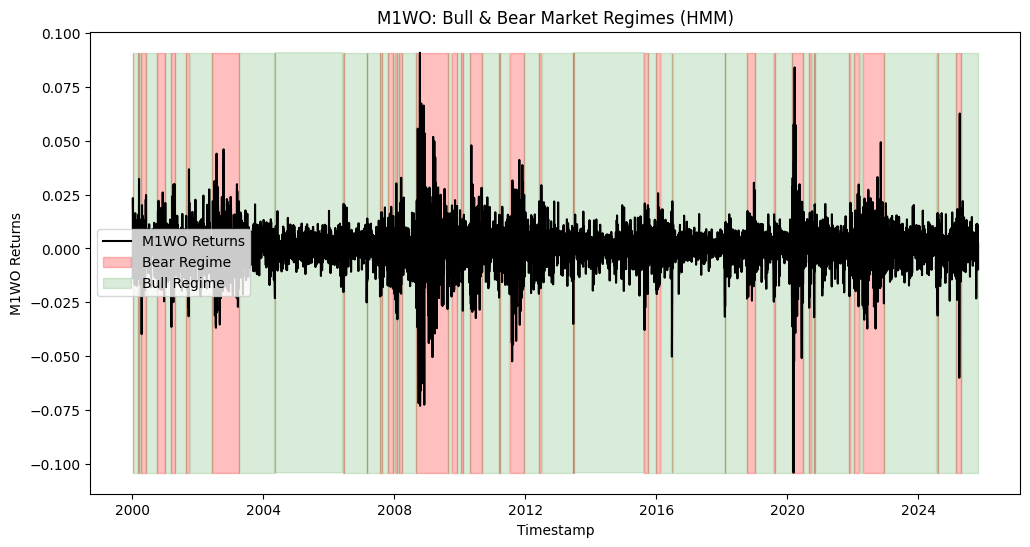

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.regression.regression_models as modl
import source.trading_strategies.trading_strategy_helpers as tsh
from source.regression.configs_gw import WITHOUT_LOOKAHEAD, ALL, MINIMAL_SETTING, WITHOUT_LOOKAHEAD_AR, ALL_COVARIATES_NON_AR, ALL_COVARIATES_AR,COMPLETED
data = dp.prepare_data(uselog=True)
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.trading_strategies.trading_strategy as tsh
import source.plot_functions.plots_trading_strategies as plot_ts
import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)
df["Rfree"] = 0

In [2]:
data_reg = pd.read_csv("../Benchmark/oos_results_regressionNow.csv", sep=";")


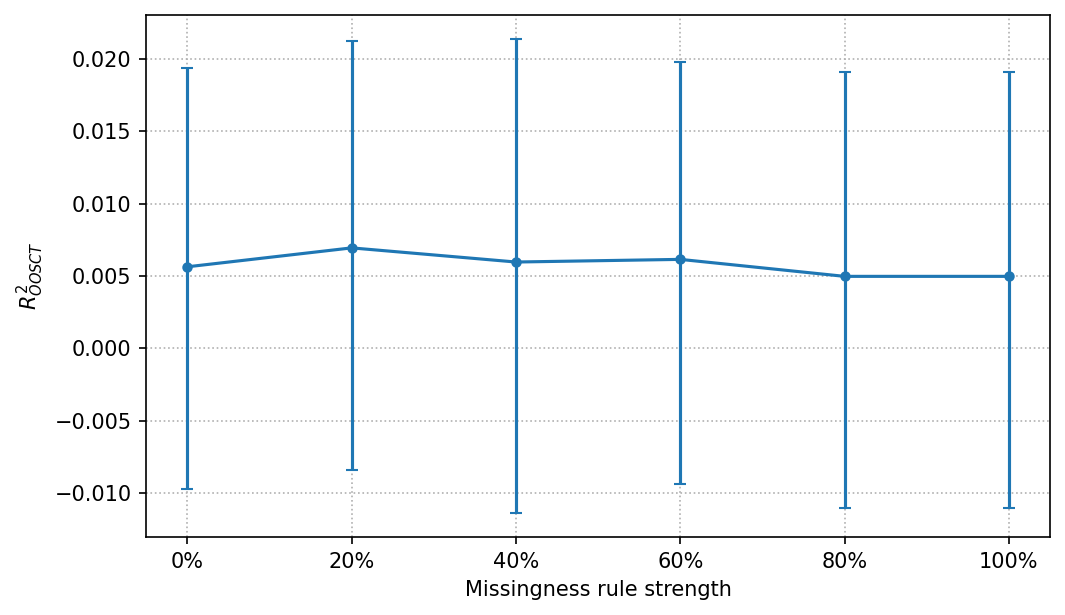

,r2ct,r2,truncated_percent,r2ctmean,r2ctstd,r2ctlower,r2ctupper,r2mean,r2std,r2lower,r2upper,hit_spread,hit_share,rule
model_name,,,,,,,,,,,,,,
tabpfn_without_lookahead_ar_non_log_no_missingness_rule,0.005635,-0.018587,0.263889,0.005287,0.007420,-0.009695,0.019322,-0.019757,0.016115,-0.052507,0.010068,-0.000051,0.736111,NaN
tabpfn_without_lookahead_ar_non_log_02_missingness_rule,0.006941,-0.017827,0.255556,0.006682,0.007615,-0.008356,0.021233,-0.018874,0.015998,-0.052620,0.010772,0.002765,0.744444,0.2
tabpfn_without_lookahead_ar_non_log_04_missingness_rule,0.005965,-0.016606,0.236111,0.005582,0.007947,-0.011382,0.021376,-0.017820,0.015712,-0.049008,0.011751,0.002354,0.763889,0.4
tabpfn_without_lookahead_ar_non_log_06_missingness_rule,0.006148,-0.016877,0.236111,0.005724,0.007463,-0.009354,0.019800,-0.018108,0.015716,-0.050469,0.011404,0.001834,0.763889,0.6
tabpfn_without_lookahead_ar_non_log_08_missingness_rule,0.004975,-0.019046,0.243056,0.004594,0.007448,-0.010994,0.019049,-0.020257,0.016075,-0.053807,0.009540,0.000832,0.756944,0.8
tabpfn_without_lookahead_ar_non_log_10_missingness_rule,0.004975,-0.019046,0.243056,0.004594,0.007448,-0.010994,0.019049,-0.020257,0.016075,-0.053807,0.009540,0.000832,0.756944,1.0


In [7]:
import re
import numpy as np
import matplotlib.pyplot as plt

def plot_tabpfn_missingness_rule(
    df,
    base_prefix="tabpfn_without_lookahead_ar_non_log",
    y_col="r2ct",
    lower_col="r2ctlower",
    upper_col="r2ctupper",
    include_baseline=True,          # include "..._no_missingness_rule"
    baseline_label="none",
    savepath_base=None
):
    d = df.copy()

    # ensure index holds model names
    if d.index.name != "model_name" and "model_name" in d.columns:
        d = d.set_index("model_name")

    names = d.index.to_series().astype(str)

    # Keep relevant rows (handle typo "missignness" too)
    mask = (
        names.str.startswith(base_prefix)
        & (names.str.contains("missingness_rule") | names.str.contains("missignness_rule"))
    )
    if include_baseline:
        mask = mask | names.str.fullmatch(re.escape(base_prefix) + r"_no_missingness_rule")

    d = d.loc[mask].copy()
    if d.empty:
        raise ValueError("No TabPFN missingness-rule rows found with the expected naming pattern.")

    # Parse rule strength:
    # - "..._no_missingness_rule" -> NaN (will become baseline label)
    # - "..._02_missignness_rule" -> 0.2, "..._10_..." -> 1.0
    def parse_rule(name: str):
        if name.endswith("_no_missingness_rule"):
            return np.nan
        m = re.search(r"_(\d{2})_(?:missignness|missingness)_rule$", name)
        if not m:
            return None
        return int(m.group(1)) / 10.0  # 02->0.2, 10->1.0

    d["rule"] = [parse_rule(n) for n in d.index]
    d = d[d["rule"].notna() | d.index.to_series().str.endswith("_no_missingness_rule")].copy()

    # Numeric y + CI
    for c in [y_col, lower_col, upper_col]:
        if c not in d.columns:
            raise ValueError(f"Missing column '{c}'.")
        d[c] = d[c].astype(float)

    # Sort: baseline first, then increasing rule
    d["_is_baseline"] = d.index.to_series().str.endswith("_no_missingness_rule")
    d = d.sort_values(["_is_baseline", "rule"], ascending=[False, True])

    # Build categorical x labels
    x_labels = []
    for is_base, r in zip(d["_is_baseline"].to_numpy(), d["rule"].to_numpy()):
        if is_base:
            x_labels.append("0%")
        else:
            x_labels.append(f"{int(round(r*100))}%")  # 0.2->20%
    x = np.arange(len(d))
    y = d[y_col].to_numpy()
    lo = d[lower_col].to_numpy()
    hi = d[upper_col].to_numpy()
    yerr = np.vstack([y - lo, hi - y])

    # Plot
    fig, ax = plt.subplots(figsize=(7.2, 4.2), dpi=150)
    ax.errorbar(x, y, yerr=yerr, fmt="o-", capsize=3, linewidth=1.5, markersize=4)

    #ax.set_title(f"{base_prefix}: {y_col} vs missingness rule")
    ax.set_xlabel("Missingness rule strength")
    ax.set_ylabel(r"$R^2_{OOSCT}$")
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.grid(True, linestyle=":", linewidth=0.8)

    fig.tight_layout()

    if savepath_base:
        fig.savefig(f"{savepath_base}_tabpfn_missingness_rule.png", bbox_inches="tight")
        fig.savefig(f"{savepath_base}_tabpfn_missingness_rule.pdf", bbox_inches="tight")

    plt.show()
    return d.drop(columns=["_is_baseline"], errors="ignore")


# Example:
plot_tabpfn_missingness_rule(data_reg, savepath_base="tabpfn")


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- shared thesis style ----------
def apply_thesis_style(ax, base_fontsize=12):
    ax.tick_params(axis="both", labelsize=base_fontsize)
    ax.xaxis.label.set_size(base_fontsize + 1)
    ax.yaxis.label.set_size(base_fontsize + 1)
    ax.title.set_size(base_fontsize + 3)

    ax.grid(True, alpha=0.25, linewidth=0.8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


def shade_regimes_color(ax, x, y0, y1, regime_series):
    reg = regime_series.astype(str).values

    ax.fill_between(
        x, y0, y1,
        where=(reg == "Bear"),
        color="#d62728",   # muted red
        alpha=0.20,
        label="Bear"
    )
    ax.fill_between(
        x, y0, y1,
        where=(reg == "Bull"),
        color="#2ca02c",   # muted green
        alpha=0.15,
        label="Bull"
    )
def plot_msci_index_with_states(
    df,
    index_col="M1WO_O",
    regime_col="regime",
    date_col="timestamp",
    title="",
    ylabel="Index level",
    base_fontsize=12,
    figsize=(12, 4.8),
    save_path=None,
    show=True,
    ax=None,
):
    d = df.copy()

    if date_col in d.columns:
        x = pd.to_datetime(d[date_col])
    else:
        x = pd.to_datetime(d.index)

    level = pd.to_numeric(d[index_col], errors="coerce")
    regime = d[regime_col].astype(str)

    plot_df = pd.DataFrame(
        {"time": x, "level": level, "regime": regime}
    ).dropna()

    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        created_fig = True

    # main series
    ax.plot(
        plot_df["time"],
        plot_df["level"],
        color="#1f77b4",   # deep blue
        linewidth=1.5,
        label="MSCI World"
    )

    y0, y1 = plot_df["level"].min(), plot_df["level"].max()
    shade_regimes_color(ax, plot_df["time"], y0, y1, plot_df["regime"])

    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    apply_thesis_style(ax, base_fontsize)

    ax.legend(
        loc="upper left",
        frameon=False,
        fontsize=base_fontsize
    )

    if created_fig:
        fig.tight_layout()
        if save_path is not None:
            fig.savefig(save_path, dpi=300, bbox_inches="tight")
        if show:
            plt.show()
        else:
            plt.close(fig)

    return plot_df
def plot_equity_premium_thesis(
    y_true,
    dates=None,
    title="",
    ylabel="Equity premium",
    base_fontsize=12,
    figsize=(12, 4.8),
    save_path=None,
    data_path=None,
    show=True,
    ax=None,
):
    y_true = np.asarray(y_true, float)
    m = ~np.isnan(y_true)
    y_true = y_true[m]

    if dates is not None:
        x = pd.to_datetime(pd.Index(dates))[m]
        df = pd.DataFrame({"Date": x, "EquityPremium": y_true}).set_index("Date")
        xlab = "Date"
    else:
        x = np.arange(len(y_true))
        df = pd.DataFrame({"OOS_step": x, "EquityPremium": y_true}).set_index("OOS_step")
        xlab = "OOS step"

    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        created_fig = True

    ax.plot(
        df.index,
        df["EquityPremium"],
        color="#1f77b4",   # same blue as MSCI
        linewidth=1.5,
        label="Equity premium"
    )

    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylabel)
    apply_thesis_style(ax, base_fontsize)

    if created_fig:
        fig.tight_layout()
        if save_path is not None:
            fig.savefig(save_path, dpi=300, bbox_inches="tight")
        if data_path is not None:
            df.to_csv(data_path)
        if show:
            plt.show()
        else:
            plt.close(fig)

    return df


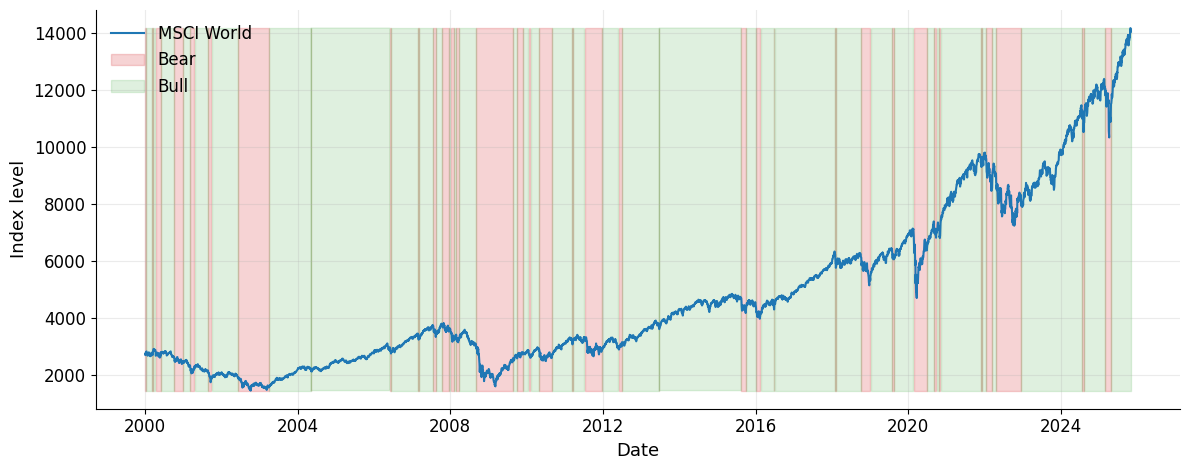

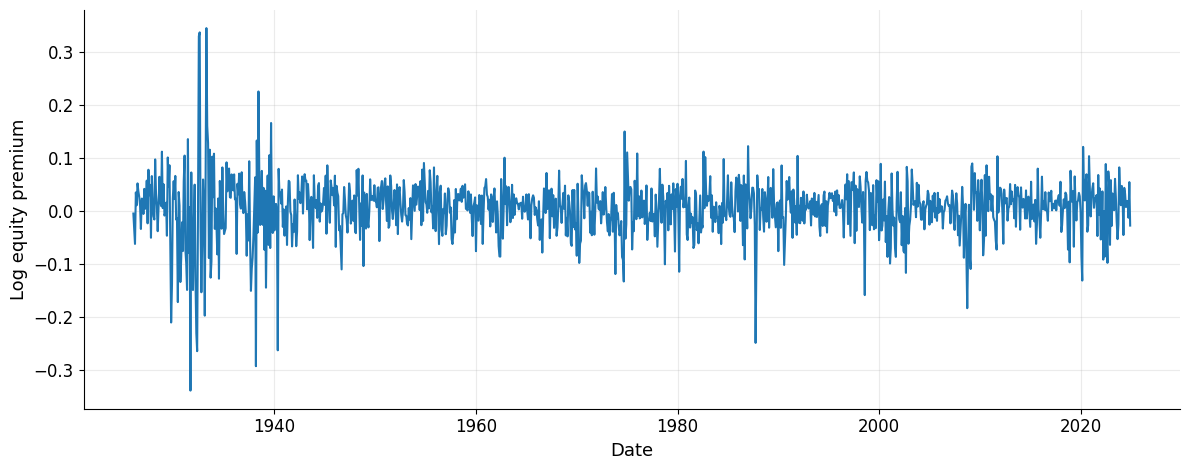

,EquityPremium
Date,
1926-01-01,-0.004705
1926-02-01,-0.036767
1926-03-01,-0.062087
1926-04-01,0.035185
1926-05-01,0.010968
...,...
2024-08-01,0.019204
2024-09-01,0.018572
2024-10-01,-0.012620


In [5]:
plot_msci_index_with_states(
    df,                 # has M1WO_O + regime
    index_col="M1WO_O",
    regime_col="regime",
    date_col="timestamp",
    save_path="msci_index_regimes.png",
    base_fontsize=12
)

plot_equity_premium_thesis(
    y_true=data["equity_premium"],
    dates=data.index,
    ylabel="Log equity premium",
    save_path="equity_premium.png",
    base_fontsize=12
)


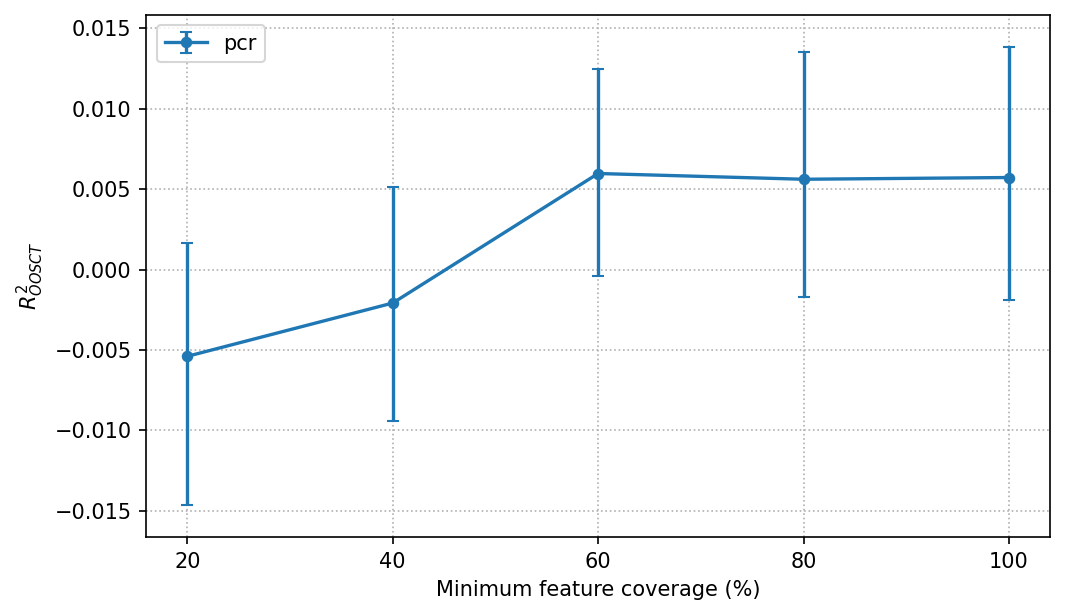

,x,r2ct,r2ctlower,r2ctupper
0,20.0,-0.005401,-0.014648,0.001627
1,40.0,-0.002086,-0.009438,0.005153
2,60.0,0.005973,-0.000392,0.012503
3,80.0,0.005615,-0.001736,0.013504
4,100.0,0.005724,-0.001894,0.013835


In [6]:
import re
import numpy as np
import matplotlib.pyplot as plt

def plot_pcr_min_feat_coverage(
    df,
    model_prefixes=("PCR_without_lookahead_ar", "pcr_without_lookahead_ar"),
    x_tag="min_feat_coverage",
    y_col="r2ct",
    lower_col="r2ctlower",
    upper_col="r2ctupper",
    model_col="model_name",
    savepath_base=None,
    figsize=(7.2, 4.2),
    dpi=150,
):
    d = df.copy()

    # Ensure model names are index
    if d.index.name != model_col:
        if model_col in d.columns:
            d = d.set_index(model_col)
        else:
            d.index.name = model_col

    for c in (y_col, lower_col, upper_col):
        if c not in d.columns:
            raise ValueError(f"Missing column '{c}'.")
        d[c] = d[c].astype(float)

    names = d.index.to_series().astype(str)

    def parse_x(name: str):
        m = re.search(rf"_{re.escape(x_tag)}_(\d*\.?\d+)$", name)
        return None if not m else float(m.group(1)) * 100.0

    # Combine PCR / pcr
    mask = np.zeros(len(names), dtype=bool)
    for pref in model_prefixes:
        mask |= names.str.startswith(pref + f"_{x_tag}_")

    dd = d.loc[mask].copy()
    if dd.empty:
        raise ValueError("No PCR rows found.")

    dd["x"] = [parse_x(n) for n in dd.index.astype(str)]
    dd = dd[dd["x"].notna()]

    # Merge duplicate x (PCR vs pcr)
    dd = (
        dd.groupby("x", as_index=False)[[y_col, lower_col, upper_col]]
          .mean()
          .sort_values("x")
    )

    x = dd["x"].to_numpy()
    y = dd[y_col].to_numpy()
    lo = dd[lower_col].to_numpy()
    hi = dd[upper_col].to_numpy()
    yerr = np.vstack([y - lo, hi - y])

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    ax.errorbar(
        x, y, yerr=yerr,
        fmt="o-",
        capsize=3,
        linewidth=1.6,
        markersize=4.5,
        color="tab:blue",
        label="pcr",
    )

    # ----- TabPFN-style axis tuning -----
    y_pad = 0.002
    y_min = min(lo) - y_pad
    y_max = max(hi) + y_pad
    ax.set_ylim(y_min, y_max)

    ax.set_xticks(x)
    ax.set_xlabel("Minimum feature coverage (%)")
    ax.set_ylabel(r"$R^2_{OOSCT}$")

    ax.grid(True, linestyle=":", linewidth=0.8)
    ax.legend(frameon=True)

    fig.tight_layout()

    if savepath_base:
        fig.savefig(f"{savepath_base}_pcr_min_feat_coverage.png", bbox_inches="tight")
        fig.savefig(f"{savepath_base}_pcr_min_feat_coverage.pdf", bbox_inches="tight")

    plt.show()
    return dd


plot_pcr_min_feat_coverage(data_reg)


In [7]:
df[df["timestamp"] >= "2009-12-30"]

,timestamp,CL1,M1WO,SXXT,SPX,NKY,SPTR,EUR003M,FEDL01,GC1,...,MOVE,VIX,USYC2Y10,VXJ,M1WO_O,FEDL01_O,EUR003M_O,state,regime,Rfree
2605,2009-12-30,0.005185,-0.005625,-0.006390,0.000195,7.929149,0.000287,-0.007,-0.01,-0.004111,...,4.648230,2.993730,5.600054,3.099642,2802.73,0.11,0.700,0,Bull,0
2606,2009-12-31,0.001009,-0.002390,-0.000164,-0.010100,0.000000,-0.010094,0.000,-0.06,0.003381,...,4.677491,3.076390,5.598192,3.099642,2796.04,0.05,0.700,0,Bull,0
2607,2010-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,...,4.677491,3.076390,5.597436,3.099642,2796.04,0.05,0.700,0,Bull,0
2608,2010-01-04,0.026731,0.017784,0.017991,0.015907,-4.583292,0.015961,0.000,0.07,0.019960,...,4.667206,2.997730,5.616633,3.030617,2846.21,0.12,0.700,0,Bull,0
2609,2010-01-05,0.003185,0.002936,0.001521,0.003120,-1.394423,0.003119,-0.001,0.00,0.000358,...,4.629863,2.962692,5.617066,3.025291,2854.58,0.12,0.699,0,Bull,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,2025-10-27,-0.003094,0.010805,0.004416,0.012215,0.592428,0.012220,0.012,0.01,-0.028695,...,4.202750,2.759377,3.889532,3.425890,14141.13,4.12,2.084,0,Bull,0
6734,2025-10-28,-0.019102,0.001684,-0.000087,0.002285,3.717267,0.002290,-0.010,0.00,-0.008961,...,4.209160,2.798500,3.879087,3.279406,14164.97,4.12,2.074,0,Bull,0
6735,2025-10-29,0.005471,-0.000275,-0.000449,-0.000044,-3.842365,-0.000037,-0.008,0.00,0.004403,...,4.185860,2.828496,3.862139,3.330775,14161.08,4.12,2.066,0,Bull,0
6736,2025-10-30,0.001487,-0.009830,-0.001306,-0.009954,-4.115259,-0.009948,-0.016,-0.25,0.008050,...,4.202900,2.827905,3.880863,3.249987,14022.56,3.87,2.050,0,Bull,0
